# 作業目標:
    
    建立一個網路模型

# 作業重點:

請修改 Name 中, 自定義的 Layer 名稱

增加一層全連階層

宣告 MODEL API, 分別採用自行定義的 Input/Output Layer

model.summary 查看 Layers stack

In [1]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model 

from keras.utils import plot_model
import matplotlib.pyplot as plt
from IPython.display import Image

#主要輸入接收新聞標題本身，即一個整數序列（每個整數編碼一個詞）。
#這些整數在1 到10,000 之間（10,000 個詞的詞彙表），且序列長度為100 個詞
#宣告一個 NAME 去定義Input
main_input = Input( shape = ( 100, ), dtype = 'int32', name = 'main_input' )


# Embedding 層將輸入序列編碼為一個稠密向量的序列，
# 每個向量維度為 512。
Embedding = Embedding( output_dim = 512, input_dim = 10000, input_length = 100 )( main_input )

# LSTM 層把向量序列轉換成單個向量，
# 它包含整個序列的上下文信息
LSTM_output = LSTM( 32 )( Embedding )

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
#插入輔助損失，使得即使在模型主損失很高的情況下，LSTM 層和Embedding 層都能被平穩地訓練
News_output = Dense( 1, activation = 'sigmoid', name = 'news_out' )( LSTM_output )

In [3]:
#輔助輸入數據與LSTM 層的輸出連接起來，輸入到模型
import keras
News_input = Input( shape = ( 5, ), name = 'news_input' )
Merge = keras.layers.concatenate( [ LSTM_output, News_input ] )


# 堆疊多個全連接網路層
Hidden1 = Dense( 64, activation = 'relu', name = 'Hidden1' )( Merge )
Hidden2 = Dense( 64, activation = 'relu', name = 'Hidden2' )( Hidden1 )
#作業解答: 新增兩層
Hidden3 = Dense( 64, activation = 'relu', name = 'Hidden3' )( Hidden2 )
Hidden4 = Dense( 64, activation = 'relu', name = 'Hidden4' )( Hidden3 )

# 最後添加主要的邏輯回歸層
main_output = Dense( 1, activation = 'sigmoid', name = 'main_output' )( Hidden4 )  

In [4]:
# 宣告 MODEL API, 分別採用自行定義的 Input/Output Layer
model = Model( inputs = [ main_input, News_input ], outputs = main_output )

In [5]:
model.summary( )

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           69760       embedding_1[0][0]                
__________________________________________________________________________________________________
news_input (InputLayer)         (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

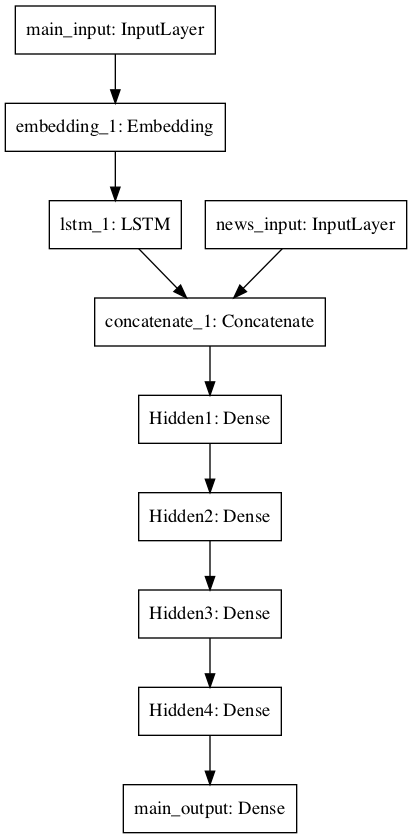

In [6]:
plot_model( model, to_file = 'Build_a_Model.png' )

Image( 'Build_a_Model.png' )